<a href="https://colab.research.google.com/github/jayasaireddy2802/AIDS_project/blob/main/Salary_Prediction_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction (Regression Problem) Machine Learning

## Import Required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from google.colab import files
uploaded = files.upload()


Saving Employee_Salary.csv to Employee_Salary.csv


## Load Data

In [ ]:
data = pd.read_csv('Employee_Salary.csv')
data

,YearsExperience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448
...,...,...
1995,19.178575,421534.69100
1996,19.254499,430478.02650
1997,19.353369,438090.84540
1998,19.842520,482242.16080


# Perform EDA

## Chekc null value is present or not

In [ ]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  2000 non-null   float64
 1   Salary           2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


In [ ]:
data.describe()

,YearsExperience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


## Visualize data

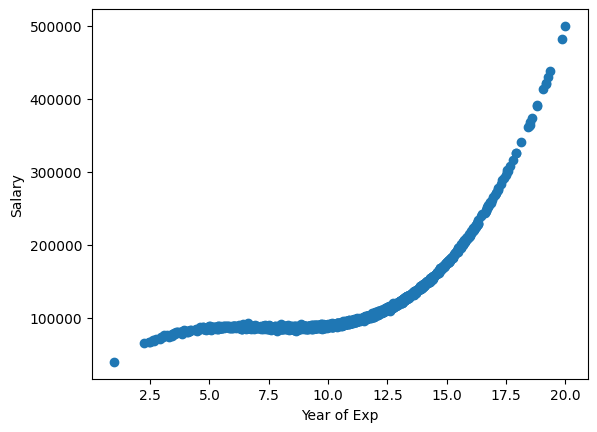

In [ ]:
plt.scatter( data['YearsExperience'] ,data['Salary'] )
plt.xlabel('Year of Exp')
plt.ylabel('Salary')
plt.show()

## Prepare data

In [ ]:
X = data.drop('Salary',axis=1)
y = data['Salary']

In [ ]:
X.shape , y.shape

((2000, 1), (2000,))

## Split data into train and test

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,random_state=101,test_size=0.2)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((1600, 1), (400, 1), (1600,), (400,))

## Define LinearRegression Model

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

## Test model

In [ ]:
pred = lr.predict(X_test)
pred

array([133657.48184893,  65695.01735404, 124465.41385167, 122961.30222213,
       124125.6130094 ,  66403.45734977, 108174.27323029,  76423.79096678,
       126849.86978375,  71449.83954872, 161440.13241723, 127823.51200174,
        68740.57877518, 130197.44133296, 129445.28880667, 130408.38894995,
       125598.80259012, 135604.09432753,  84213.49513415, 132230.98885996,
       180554.98181406,  83867.92511228, 144003.70113219, 120597.40317405,
       115337.83609456, 174756.05721728,  70770.43785782, 124918.08932942,
       110818.66569383,  79940.9464624 , 122952.74368614, 110356.84667648,
        68019.22129673,  96092.20815694,  64676.38567863, 108316.34042402,
       166864.89338706, 107858.09112971, 137549.51023932, 131867.11383695,
        84371.81818815, 114106.54377852,  57217.27866224, 120482.35307801,
       116538.63639602, 136539.16094954,  92287.79201497, 117373.16530748,
        99772.13311515, 146734.90496887,  88569.69003924,  96754.18431523,
        44029.64407056,  

In [ ]:
Y_test

1458    114309.42300
198      88048.71561
1276    102050.60310
1243    101732.70870
1267    103109.53100
            ...     
257      88011.06844
1020     91929.44333
1057     93419.00387
1230    101516.87850
510      85964.88550
Name: Salary, Length: 400, dtype: float64

## Check Actual data , Predicted data and difference between the Actual and Predicted data

In [ ]:
diff = Y_test - pred

In [ ]:
pd.DataFrame(np.c_[Y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,114309.42300,133657.481849,-19348.058849
1,88048.71561,65695.017354,22353.698256
2,102050.60310,124465.413852,-22414.810752
3,101732.70870,122961.302222,-21228.593522
4,103109.53100,124125.613009,-21016.082009
...,...,...,...
395,88011.06844,73336.515369,14674.553071
396,91929.44333,112822.587741,-20893.144411
397,93419.00387,114184.334133,-20765.330263
398,101516.87850,122408.130374,-20891.251874


## Visualize Model, that how it is performing on training data

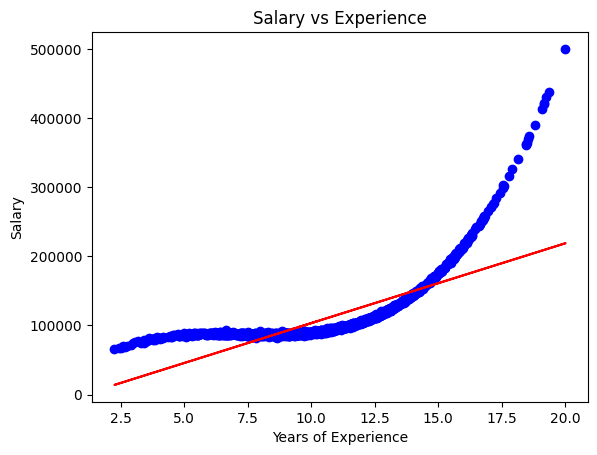

In [ ]:
plt.scatter(X_train , Y_train , color='blue')
plt.plot(X_train ,lr.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

## Visualize Model, that how it is performing on testing data

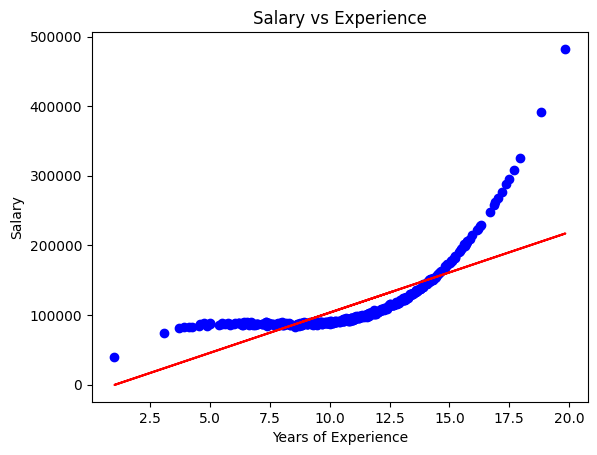

In [ ]:
plt.scatter(X_test , Y_test,color='blue')
plt.plot(X_test ,lr.predict(X_test) ,color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

## Evaluate

In [ ]:
lr.score(X_test , Y_test)

0.6044835617083196

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test,pred))
r2 = r2_score(Y_test,pred)

In [ ]:
rmse , r2

(29034.567192160703, 0.6044835617083196)

# Test on the custom data

In [ ]:
exp = 3
lr.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])} thousands")

Salary of 3 year experience employee = 22626 thousands


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
exp = 5
lr.predict([[exp]])[0]
print(f"Salary of {exp} year experience employee = {int(lr.predict([[exp]])[0])} thousands")

Salary of 5 year experience employee = 45722 thousands


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Thank You !!!!!!!!!!